<a href="https://colab.research.google.com/github/patty-13/MSML-603-UMD-MACHINE-LEARNING/blob/main/HW9_PRATYUSH_SETHI_119344675.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KMeans; Some background
Consider the set
 $D = \{ {\bf x}_{1}, {\bf x}_{2}, \cdots, {\bf x}_{N}) \} $, where ${\bf x}_i \in \mathbb{R}^d$ is a $d$ dimensional feature vector. The goal is to find $M$ clusters that with cluster centers $ \{ {\bf x}^{*c}_{1}, {\bf x}^{*c}_{2}, \cdots, {\bf x}^{*c}_{M}\} $ that can represent this data set so that the following loss function is minimized
$$
\frac{1}{N} \sum_{i=1}^N \underset{j}{min} \| {\bf x}_i - {\bf x}_j^c\|^2
$$

The cluster centers are then found using the following 
 $$
 \begin{align}
 \{ {\bf x}^{*c}_{1}, {\bf x}^{*c}_{2}, \cdots, {\bf x}^{*c}_{M}\}& = \underset{\{ {\bf x}^c_{1}, {\bf x}^c_{2}, \cdots, {\bf x}^c_{M}\}}{argmin} ~~  \frac{1}{N} \sum_{i=1}^N \underset{j}{min} \| {\bf x}_i - {\bf x}_j^c\|^2 \\
 \end{align}
 $$   
 
 Unfortunately this loss function is not convex so depending your initial condition and your optimization strategy, the minimum you find might be a local minima. Knowing this fact in most cases you solve this optimization problem as follows:


1.   Initialize cluster centers  $ \{ {\bf x}^{c}_{1}, {\bf x}^{c}_{2}, \cdots, {\bf x}^{c}_{M}\} $
2.  Find members of cluster members
$$
S_{j^*} = \{ \forall {\bf x}_i \in D ~|~ j^* = \underset{j}{srgmin} \| {\bf x}_i - {\bf x}_j^c\| \} ~~~ j^*=1, \cdots, M
$$
1.   Find new cluster cemters as follows
$$
{\bf x}^c_{j^*} \leftarrow  \frac{\sum_{\forall {x}_i\in S_{j*} }{\bf x}_i} {|S_{j*}|} ~~ j^*= 1, \cdots, M
$$
where $|S_{j*}|$ is the cardinality of $S_{j*}$ or the number of elements of $S_{j*}$.
2.   Calculate the cost function 
$$
\frac{1}{N} \sum_{i=1}^N \underset{j}{min} \| {\bf x}_i - {\bf x}_{j^*}^c\|^2
$$
if the number of initialization attempt is reached stop, otherwise go to 2 (we can also set some threshold)



#Problem 1 (30 points)
Generate a code that implements KMeans as given above. To reduce the sensitivity to initial condition your code should choose several (10) random initial condition and choose the one that results in minimum total error. Use the data that is generated in the following code to test your code. 

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import random as rand

In [ ]:
blob_centers = np.array(
    [[ 0.2,  2],
     [-1.5 ,  2],
     [-3,  1.8],
     [-3,  3],
     [-3,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [ ]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=17)

Text(0, 0.5, '$x_2$')

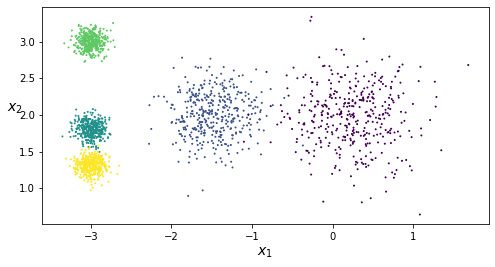

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)


#### SOLUTION

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


minimum error 226.17708645118137
centroid values at minimum cost [[array([-2.87800224,  1.50967185]), array([-0.09024083,  2.03550802]), array([-2.99803097,  2.99364419]), array([-1.60357449,  1.92125164]), array([-3.04752696,  1.57708153])], [array([-2.93175563,  1.34884969]), array([0.22921739, 1.98584938]), array([-2.99803097,  2.99364419]), array([-1.48487298,  2.00492043]), array([-3.0389403 ,  1.69299839])], [array([-2.99365373,  1.30783474]), array([0.25364568, 1.98357497]), array([-2.99803097,  2.99364419]), array([-1.46628572,  2.00664244]), array([-2.99935348,  1.8026758 ])], [array([-2.99568552,  1.31054173]), array([0.25364568, 1.98357497]), array([-2.99803097,  2.99364419]), array([-1.46235895,  2.00682288]), array([-2.99368821,  1.80697116])], [array([-2.99568552,  1.31054173]), array([0.25364568, 1.98357497]), array([-2.99803097,  2.99364419]), array([-1.46235895,  2.00682288]), array([-2.99368821,  1.80697116])], [array([-2.99568552,  1.31054173]), array([0.25364568, 1.

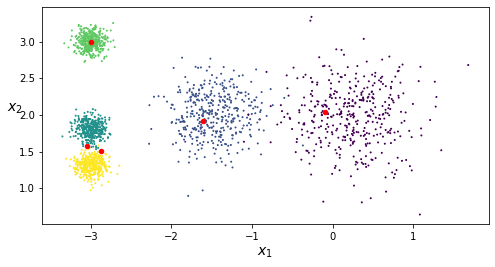

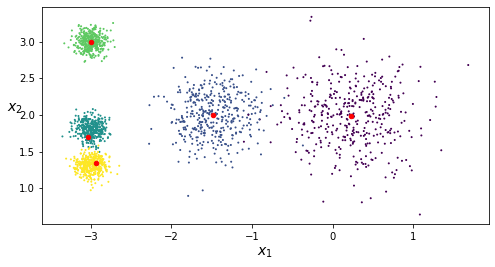

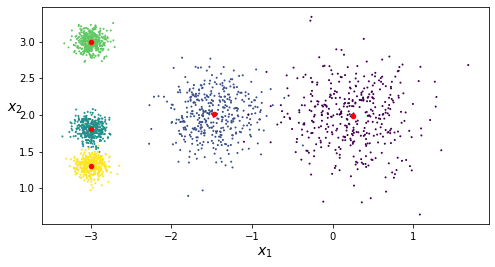

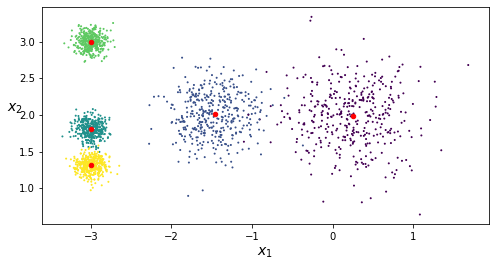

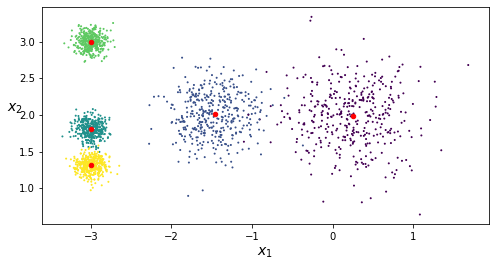

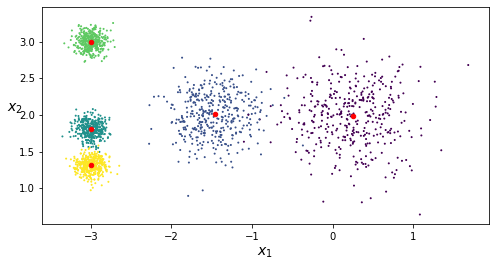

In [ ]:
# SOLUTION 
# setting up seed
np.random.seed(123)
centroids = []

# step 1: Function for intital random center generation of points

def cluster_centers(m):
  centroids = []
  for _ in range(len(blob_std)):
    centroids.append(X[ np.random.randint(0,m-1)])
  return centroids

# step 2: Assignment of centroid to each individual point by calculating minimum
#         distance from that point and then assigning the cluster index to that 
#         data point.

def distance_cd(x,y):
  diff_clus = np.linalg.norm(np.array(x)-np.array(y))
  return diff_clus

def center_to_datapoint(centroids, X):
  assign_centroid = []
  for i in X:
    distance = []
    for j in centroids:
      distance.append(distance_cd(i,j))
    assign_centroid.append(np.argmin(distance))
  return assign_centroid


# step-3 finding new centroids by grouping the centroids and taking new average of
#        centroids
def new_centroid(X, centroids, assign_centroid, k):
  new_centroids = []
  for cent_values in range(k):
    cluster = []
    for data_points in range(len(X)):
      if(assign_centroid[data_points] == cent_values):
        cluster.append(X[data_points])
    mean_centroids = np.mean(cluster, axis = 0)
    new_centroids.append(mean_centroids)
  return new_centroids

# step -4 calculating cost or loss
def cost(X, assignment, centroids):
  errors = []
  for i in range(len(X)):
    centroid = centroids[assignment[i]]

    error = np.linalg.norm(np.array(X[i]) - np.array(centroid))

    errors.append(error**2)

  c = sum(errors)
  return c

################################### Driver code ################################
def knn(X, k, max_iter = 100, tol = pow(10,-3)):
  assignment = []
  total_cost = []
  total_centroids = []
  i = -1
  value = True

  # step 1 finding the random center points for clusters
  m = len(X)
  centroids = cluster_centers(m)

  # iterating while minimizing the loss for the clusters
  while(value):
    # assign the data points to the closet center
    assignment = center_to_datapoint(centroids, X)
    
    # calculating new centroids
    centroids = new_centroid(X, centroids, assignment, k)
    total_centroids.append(centroids)
    # plotting new graphs
    # centr = np.array(centroids)
    # plt.figure(figsize=(8, 4))
    # plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    # plt.scatter(centr[:,0],centr[:,1], s=20, c='red')
    # plt.xlabel("$x_1$", fontsize=14)
    # plt.ylabel("$x_2$", fontsize=14, rotation=0)
    
    # computing cost
    cost_mean = cost(X, assignment, centroids)
    total_cost.append(cost_mean)
    cot = cost_mean
    # converging to minimum error.
    if(len(total_cost)<2):
      value = True
    else:
      if(round(total_cost[i],3)!= round(total_cost[i-1],3)):
        value = True
      else:
        value = False
    i = i + 1
  return total_centroids, cot


################################## driver code ################################
k = len(blob_std)
n_init =10
cent_a = []
cost_a = []

# initialized 10 random values for centroid
for i in range(n_init):
  cent, c = knn(X, k)
  cent_a.append(cent)
  cost_a.append(c)

# saved the cost and centroids that had minimum loss
p = cost_a.index(min(cost_a))
print("minimum TOTAL COST",cost_a[p])
print("centroid values at minimum cost",cent_a[p])
z = np.array(cent_a[p])

# displaying the graph for only those sample which had minimum loss among all losses
print(len(z))
for k in range(len(z)):
  centr = np.array(cent_a[p][k])
  plt.figure(figsize=(8, 4))
  plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
  plt.scatter(centr[:,0],centr[:,1], s=20, c='red')
  plt.xlabel("$x_1$", fontsize=14)
  plt.ylabel("$x_2$", fontsize=14, rotation=0)
      

In [ ]:
# TRIAL -2  # JUST TRYING DO NOT CONSIDER THIS AS SOLUTION FOR HW-9
from numpy.ma.core import argmax

def rand_centroids(m):
  centroids = []
  for _ in range(m):
    centroids.append(X[ np.random.randint(0,m-1)])
  return centroids

def center_to_datapoint(centroids, X):
  assign_centroid = []
  for i in X:
    distance = []
    for j in centroids:
      distance.append(np.linalg.norm(np.array(i)-np.array(j)))
    assign_centroid.append(np.argmin(distance))
  return assign_centroid

def new_centroids(X, centroids, assign_centroid, k):
  new_centroids = []
  for i in range(k):
    cluster = []
    for j in range(len(X)):
      if(assign_centroid[j] == i):
        cluster.append(X[j])
    mean_centroids = np.mean(cluster, axis = 0)
    new_centroids.append(mean_centroids)
  return new_centroids


def cost(X, assignment, centroids):
  errors = []
  for i in range(len(X)):
    centroid = centroids[assignment[i]]

    error = np.linalg.norm(np.array(X[i]) - np.array(centroid))

    errors.append(error**2)

  c = np.sum(errors)
  return c

def kmeans(X, k, max_itrs=100, abs_tol=1e-16, rel_tol=1e-16):

  assignment = []
  total_cost = []
  best_cost = []
  centroids = []
  i = -1
  value = False
  
  # step-1 calculating random centroids
  m = len(X)
  centroids = rand_centroids(m)

  for i in range(max_itrs):

    assignment = center_to_datapoint(centroids, X)

    cent = new_centroids(X, centroids, assignment, k)

    loss = cost(X,assignment, cent)
    total_cost.append(loss)
    if i:

      loss_difference = np.abs(previous_loss - loss)
      if loss_difference < abs_tol and  loss_difference / previous_loss  < rel_tol:

        break
    previous_loss = loss

  return centroids, cent, total_cost


n_init = 10
k = len(blob_std)
for i in range(n_init):
  best_rand_centroid, best_centroid, best_cost = kmeans(X, k, max_itrs = 100, abs_tol =1e-16, rel_tol =1e-16)
  print(i)
  print("Best Random centroid", best_rand_centroid)
  print("Best centroid", best_centroid)
  print("Best cost",  best_cost)
  print(" ")
  centr = np.array(best_centroid)
  plt.figure(figsize=(8, 4))
  plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
  plt.scatter(centr[:,0],centr[:,1], s=20, c='red')
  plt.xlabel("$x_1$", fontsize=14)
  plt.ylabel("$x_2$", fontsize=14, rotation=0)

IndexError: ignored